R shiny - look at Iris k-means clustering for a simple example


The Goodreads dataset was taken from www.goodreads.com
It contain comprehensive list of all books listed in goodreads as of April 2019.
In this notebook I will attempt to recreate many of the functionalities found in the Goodreads website.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### 1. Loading and initial examination of the goodread dataset.

In [2]:
bookdata = pd.read_csv('mybookfile.csv')
bookdata.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN


In [3]:
#How many books are in the data
bookdata.shape

(13719, 11)

In [4]:
bookdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 11 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null object
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
# num_pages           13719 non-null object
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
Unnamed: 10           5 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


In [5]:
bookdata.describe()

,bookID,ratings_count,text_reviews_count,Unnamed: 10
count,13719.000000,1.371900e+04,13719.000000,5.000000
mean,22160.579270,1.775903e+04,533.606385,6.200000
std,13699.603351,1.129371e+05,2528.600316,6.418723
min,1.000000,0.000000e+00,0.000000,0.000000
25%,10621.000000,8.300000e+01,7.000000,4.000000
50%,21322.000000,6.300000e+02,40.000000,4.000000
75%,33322.000000,4.737000e+03,222.000000,6.000000
max,47709.000000,5.629932e+06,93619.000000,17.000000


### 2. Investigate nature of Unnamed column that contains little data

In [6]:
#what is the Unnamed colunm?  There is only 5 entries - probably not important but will leave for now.
nonnanin10 = bookdata[bookdata['Unnamed: 10'].notnull()]
print(nonnanin10)

       bookID                                              title  \
4010    12224  Streetcar Suburbs: The Process of Growth in Bo...   
5686    16914                  The Tolkien Fan's Medieval Reader   
7054    22128                     Patriots (The Coming Collapse)   
10599   34523  The Flying Sorcerers: More Comic Tales of Fantasy   
10666   34889  Brown's Star Atlas: Showing All The Bright Sta...   

                                                 authors  \
4010                                     Sam Bass Warner   
5686            David E. Smith (Turgon of TheOneRing.net   
7054                                        James Wesley   
10599  Peter Haining-Roald Dahl-Terry Pratchett-Angel...   
10666                                              Brown   

                                          average_rating  isbn      isbn13  \
4010                                   Jr.-Sam B. Warner  3.57   674842111   
5686    one of the founding members of this Tolkien w...   3.6  1593600119

It looks like there is a shift in the cells in all of rows that contain a float in Unnamed: 10 colunm. I will fix these mistakes.  Note the isbn # in isbn13 don't all seen correct.  I will investigate this as well.



In [7]:
print(bookdata.loc[[4010]])


      bookID                                              title  \
4010   12224  Streetcar Suburbs: The Process of Growth in Bo...   

              authors      average_rating  isbn     isbn13 language_code  \
4010  Sam Bass Warner   Jr.-Sam B. Warner  3.57  674842111   9.78067E+12   

     # num_pages  ratings_count  text_reviews_count  Unnamed: 10  
4010       en-US            236                  55          6.0  


In [8]:

bookdata.at[4010,'average_rating'] = bookdata.at[4010, 'isbn']
bookdata.at[4010,'isbn'] = bookdata.at[4010, 'isbn13']
bookdata.at[4010,'isbn13'] = bookdata.at[4010, 'language_code']
bookdata.at[4010,'language_code'] = bookdata.at[4010, '# num_pages']
bookdata.at[4010,'# num_pages'] = bookdata.at[4010, 'ratings_count']
bookdata.at[4010,'ratings_count'] = bookdata.at[4010, 'text_reviews_count']
bookdata.at[4010,'text_reviews_count'] = bookdata.at[4010, 'Unnamed: 10']

In [9]:
print(bookdata.loc[[4010]])

      bookID                                              title  \
4010   12224  Streetcar Suburbs: The Process of Growth in Bo...   

              authors average_rating       isbn       isbn13 language_code  \
4010  Sam Bass Warner           3.57  674842111  9.78067E+12         en-US   

     # num_pages  ratings_count  text_reviews_count  Unnamed: 10  
4010         236             55                   6          6.0  


In [10]:
#I like to change the name of a df anytime I change it and will do this throughout
bookdata1=bookdata

In [11]:
print(bookdata1.loc[[5686]])


      bookID                              title  \
5686   16914  The Tolkien Fan's Medieval Reader   

                                       authors  \
5686  David E. Smith (Turgon of TheOneRing.net   

                                         average_rating isbn      isbn13  \
5686   one of the founding members of this Tolkien w...  3.6  1593600119   

     language_code # num_pages  ratings_count  text_reviews_count  Unnamed: 10  
5686   9.78159E+12         eng            400                  25          4.0  


In [12]:
bookdata1.at[5686,'authors'] = 'David E. Smith'
bookdata1.at[5686,'average_rating'] = bookdata1.at[5686, 'isbn']
bookdata1.at[5686,'isbn'] = bookdata1.at[5686, 'isbn13']
bookdata1.at[5686,'isbn13'] = bookdata1.at[5686, 'language_code']
bookdata1.at[5686,'language_code'] = bookdata1.at[5686, '# num_pages']
bookdata1.at[5686,'# num_pages'] = bookdata1.at[5686, 'ratings_count']
bookdata1.at[5686,'ratings_count'] = bookdata1.at[5686, 'text_reviews_count']
bookdata1.at[5686,'text_reviews_count'] = bookdata1.at[5686, 'Unnamed: 10']

In [13]:
print(bookdata1.loc[[5686]])

      bookID                              title         authors  \
5686   16914  The Tolkien Fan's Medieval Reader  David E. Smith   

     average_rating        isbn       isbn13 language_code # num_pages  \
5686            3.6  1593600119  9.78159E+12           eng         400   

      ratings_count  text_reviews_count  Unnamed: 10  
5686             25                   4          4.0  


In [14]:
bookdata2 = bookdata1

In [15]:
print(bookdata2.loc[[7054]])

      bookID                           title       authors average_rating  \
7054   22128  Patriots (The Coming Collapse)  James Wesley         Rawles   

      isbn      isbn13 language_code # num_pages  ratings_count  \
7054  3.63  156384155X   9.78156E+12         eng            342   

      text_reviews_count  Unnamed: 10  
7054                  38          4.0  


In [16]:
bookdata2.at[7054,'authors'] = 'James Wesley Rawles'
bookdata2.at[7054,'average_rating'] = bookdata2.at[7054, 'isbn']
bookdata2.at[7054,'isbn'] = bookdata2.at[7054, 'isbn13']
bookdata2.at[7054,'isbn13'] = bookdata2.at[7054, 'language_code']
bookdata2.at[7054,'language_code'] = bookdata2.at[7054, '# num_pages']
bookdata2.at[7054,'# num_pages'] = bookdata2.at[7054, 'ratings_count']
bookdata2.at[7054,'ratings_count'] = bookdata2.at[7054, 'text_reviews_count']
bookdata2.at[7054,'text_reviews_count'] = bookdata2.at[7054, 'Unnamed: 10']

In [17]:
print(bookdata2.loc[[7054]])

      bookID                           title              authors  \
7054   22128  Patriots (The Coming Collapse)  James Wesley Rawles   

     average_rating        isbn       isbn13 language_code # num_pages  \
7054           3.63  156384155X  9.78156E+12           eng         342   

      ratings_count  text_reviews_count  Unnamed: 10  
7054             38                   4          4.0  


In [18]:
bookdata3 = bookdata2

In [19]:
bookdata2.shape

(13719, 11)

In [20]:
print(bookdata3.loc[10599])

bookID                                                            34523
title                 The Flying Sorcerers: More Comic Tales of Fantasy
authors               Peter Haining-Roald Dahl-Terry Pratchett-Angel...
average_rating         Jr.-C.S. Lewis-P.G. Wodehouse-Michael Moorcoc...
isbn                                                               3.98
isbn13                                                       1857237250
language_code                                               9.78186E+12
# num_pages                                                         eng
ratings_count                                                       383
text_reviews_count                                                 2197
Unnamed: 10                                                          17
Name: 10599, dtype: object


In [21]:
print(bookdata3.loc[10599, 'authors'])
print(bookdata3.loc[10599, 'average_rating'])

Peter Haining-Roald Dahl-Terry Pratchett-Angela Carter-Arthur C. Clarke-Kurt Vonnegut
 Jr.-C.S. Lewis-P.G. Wodehouse-Michael Moorcock-L. Sprague de Camp-Fletcher Pratt-Eric Knight-Mervyn Peake-Piers Anthony-John Collier-Fredric Brown-Nelson S. Bond-Thomas M. Disch-Robert Bloch-Stephen Leacock-John Wyndham-Stanisław Lem-Cordwainer Smith-Robert Sheckley-William F. Nolan-Harry Harrison


In [22]:
bookdata3.at[10599, 'authors'] = 'Peter Haining-Roald Dahl-Terry Pratchett-Angela Carter-Arthur C. Clarke-Kurt Vonnegut Jr.-C.S. Lewis-P.G. Wodehouse-Michael Moorcock-L. Sprague de Camp-Fletcher Pratt-Eric Knight-Mervyn Peake-Piers Anthony-John Collier-Fredric Brown-Nelson S. Bond-Thomas M. Disch-Robert Bloch-Stephen Leacock-John Wyndham-Stanisław Lem-Cordwainer Smith-Robert Sheckley-William F. Nolan-Harry Harrison'
bookdata3.at[10599, 'average_rating'] = bookdata3.at[10599, 'isbn']
bookdata3.at[10599, 'isbn'] = bookdata3.at[10599, 'isbn13']
bookdata3.at[10599, 'isbn13'] = bookdata3.at[10599, 'language_code']
bookdata3.at[10599, 'language_code'] = bookdata3.at[10599, '# num_pages']
bookdata3.at[10599, '# num_pages'] = bookdata3.at[10599, 'ratings_count']
bookdata3.at[10599, 'ratings_count'] = bookdata3.at[10599, 'text_reviews_count']
bookdata3.at[10599, 'text_reviews_count'] = bookdata3.at[10599, 'Unnamed: 10']

In [23]:
print(bookdata3.loc[10599])

bookID                                                            34523
title                 The Flying Sorcerers: More Comic Tales of Fantasy
authors               Peter Haining-Roald Dahl-Terry Pratchett-Angel...
average_rating                                                     3.98
isbn                                                         1857237250
isbn13                                                      9.78186E+12
language_code                                                       eng
# num_pages                                                         383
ratings_count                                                      2197
text_reviews_count                                                   17
Unnamed: 10                                                          17
Name: 10599, dtype: object


In [24]:
bookdata4=bookdata3

In [25]:
print(bookdata4.loc[10666])

bookID                                                            34889
title                 Brown's Star Atlas: Showing All The Bright Sta...
authors                                                           Brown
average_rating                                           Son & Ferguson
isbn                                                                  0
isbn13                                                        851742718
language_code                                               9.78085E+12
# num_pages                                                         eng
ratings_count                                                        49
text_reviews_count                                                    0
Unnamed: 10                                                           0
Name: 10666, dtype: object


In [26]:
bookdata4.at[10666, 'average_rating'] = bookdata3.at[10666, 'isbn']
bookdata4.at[10666, 'isbn'] = bookdata3.at[10666, 'isbn13']
bookdata4.at[10666, 'isbn13'] = bookdata3.at[10666, 'language_code']
bookdata4.at[10666, 'language_code'] = bookdata3.at[10666, '# num_pages']
bookdata4.at[10666, '# num_pages'] = bookdata3.at[10666, 'ratings_count']
bookdata4.at[10666, 'ratings_count'] = bookdata3.at[10666, 'text_reviews_count']
bookdata4.at[10666, 'text_reviews_count'] = bookdata3.at[10666, 'Unnamed: 10']

In [27]:
print(bookdata4.loc[10666])

bookID                                                            34889
title                 Brown's Star Atlas: Showing All The Bright Sta...
authors                                                           Brown
average_rating                                                        0
isbn                                                          851742718
isbn13                                                      9.78085E+12
language_code                                                       eng
# num_pages                                                          49
ratings_count                                                         0
text_reviews_count                                                    0
Unnamed: 10                                                           0
Name: 10666, dtype: object


In [28]:
#looking to see if more info about author is mixed in with title
print(bookdata4.loc[10666, "title"])

Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.


The last row that was corrected has no rating/rewiews and the author name is incomplete.  I will keep it anyway for now.
May still be able to recommend based on category, however, note that it this time I don't believe I have enough info it this dataset to place books in categories

### 3.  Delete the Unnamed column and take a second look at data
The usable data in the unnamed a column is now in the correct column, therefore it can now be deleted.


In [29]:
bookdata5 = bookdata4.drop('Unnamed: 10', axis=1) 
bookdata5.rename(columns={'# num_pages': 'pages'}, inplace=True)
bookdata5.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [30]:
bookdata5.shape

(13719, 10)

In [31]:
#Now I will make the average rate and the # num_pages numerical
bookdata5['average_rating'] = pd.to_numeric(bookdata5['average_rating'])
bookdata5['pages'] = pd.to_numeric(bookdata5['pages'])
bookdata5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13719 entries, 0 to 13718
Data columns (total 10 columns):
bookID                13719 non-null int64
title                 13719 non-null object
authors               13719 non-null object
average_rating        13719 non-null float64
isbn                  13719 non-null object
isbn13                13719 non-null object
language_code         13719 non-null object
pages                 13719 non-null int64
ratings_count         13719 non-null int64
text_reviews_count    13719 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.0+ MB


In [32]:
bookdata5.describe()

,bookID,average_rating,pages,ratings_count,text_reviews_count
count,13719.000000,13719.000000,13719.000000,1.371900e+04,13719.000000
mean,22160.579270,3.930265,342.380713,1.775909e+04,533.439901
std,13699.603351,0.359432,252.618887,1.129371e+05,2528.565801
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10621.000000,3.770000,196.000000,8.250000e+01,7.000000
50%,21322.000000,3.960000,301.000000,6.300000e+02,40.000000
75%,33322.000000,4.130000,421.000000,4.737000e+03,222.000000
max,47709.000000,5.000000,6576.000000,5.629932e+06,93619.000000


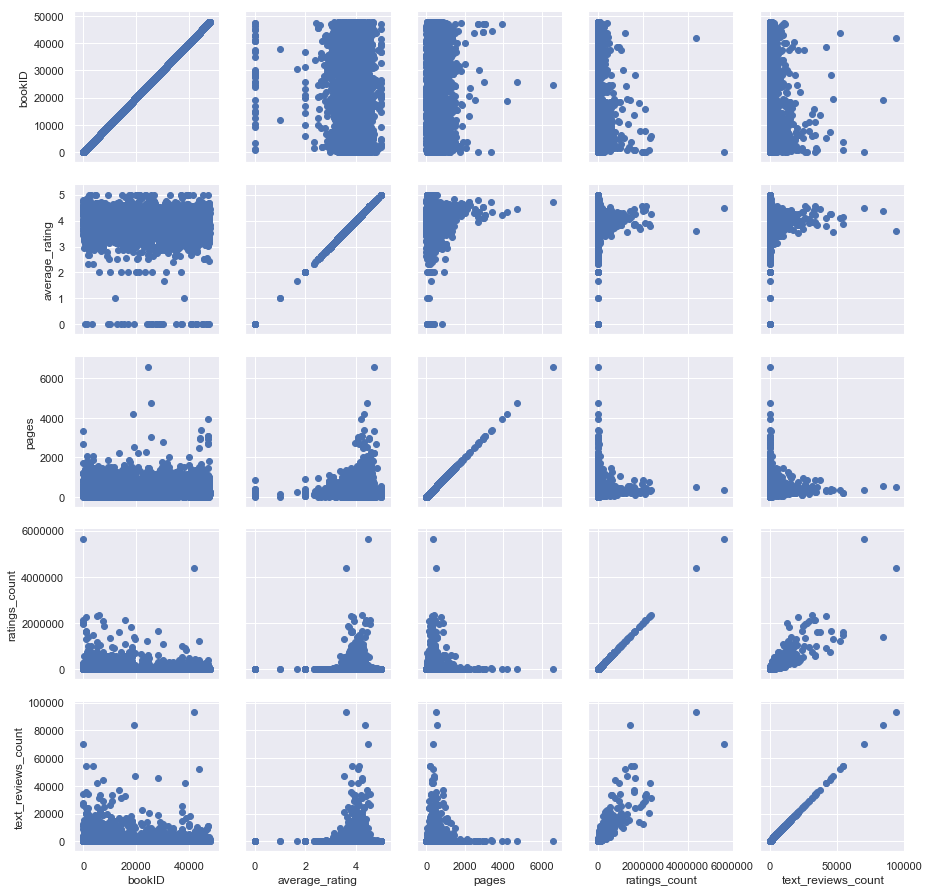

In [33]:
g = sns.PairGrid(bookdata5, vars=['bookID', 'average_rating', 'pages', 'ratings_count', 'text_reviews_count' ])
g = g.map(plt.scatter)

Based on the plots, I am dropping book ID.  It appears the only thing that has a slight correlation with book ID is the rating_count and text_reviews_count - will verify below

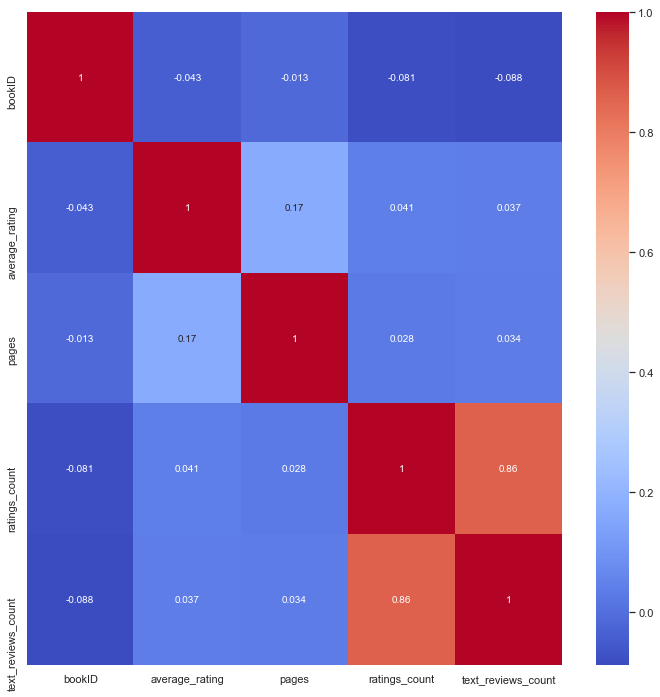

In [34]:
correlatedata = bookdata5.corr()
names = correlatedata.index
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(bookdata5[names].corr(), annot = True, cmap ='coolwarm')

In [35]:
#heatmap shows (darkest blue) that ID does indeed have lowest correlation with any of the other features so I will drop for now
#I am also changing the name of the dataframe to df - for brievity!
df = bookdata5.drop('bookID', axis=1) 
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [36]:
df.shape

(13719, 9)

### 4. Look for duplicate entries in the dataset and books with no ratings
There are 2 features that should be unique to a specific book in this dataset. These are the isbn and the isbn13.  I will check both of these to look for duplicates. That way, if there is a type-O in an entry, I will likely catch duplicates anyway.

In [37]:
dupisbn = df[df.duplicated(['isbn'])]
print(dupisbn)

Empty DataFrame
Columns: [title, authors, average_rating, isbn, isbn13, language_code, pages, ratings_count, text_reviews_count]
Index: []


In [38]:
duplicateRows = df[df.duplicated(['isbn13'])]
print(duplicateRows)

Empty DataFrame
Columns: [title, authors, average_rating, isbn, isbn13, language_code, pages, ratings_count, text_reviews_count]
Index: []


In [39]:
#just double checking here that the lines above truly indicate there is no duplicates, i.e. this is redundantdf = df.drop_duplicates(subset='isbn', keep="first")
df = df.drop_duplicates(subset='isbn', keep="first")

In [40]:
df = df.drop_duplicates(subset='isbn13', keep="first")
df.shape

(13719, 9)

Find Books with no ratings and put in a separate df for a "Be the first to Rate" category

In [41]:
no_rating =pd.DataFrame(df.loc[df.ratings_count == 0])

In [42]:
no_rating.head()

,title,authors,average_rating,isbn,isbn13,language_code,pages,ratings_count,text_reviews_count
290,Lonely Planet Londres,Lonely Planet-Sarah Johnstone-Tom Masters,4.03,8408064762,9788408064763,spa,480,0,0
291,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet-Mark Honan,0.00,1740592050,9781740592055,eng,295,0,0
422,The Clan of the Cave Bear Part 2 of 2 (Earth'...,Jean M. Auel,4.56,5557075313,9785557075312,eng,24,0,0
424,Juiced Official Strategy Guide,Doug Walsh,0.00,744005612,9780744005615,eng,112,0,0
587,American Government: Continuity and Change Al...,Karen O'Connor-Larry J. Sabato,2.95,321317106,9780321317100,eng,664,0,0


##### All of the books in no_rating have no ratings_count and all but one have no text_reviews_count (1 has 1 review).  Because of this I will delete from my data set 
I don't know how they could have an average_rating if there's no ratings count...
I'm considering this faulty data

In [43]:
listdel = no_rating.index.tolist()

In [44]:
print(listdel)

[290, 291, 422, 424, 587, 588, 595, 705, 836, 957, 1054, 1122, 1265, 1838, 1982, 2427, 2675, 2954, 2987, 3229, 3288, 3532, 3587, 3589, 3724, 3744, 3878, 3883, 4011, 4048, 4182, 4207, 4306, 4850, 4974, 5015, 5042, 5076, 5660, 5734, 5871, 5873, 6427, 6597, 6599, 6648, 6747, 6843, 6872, 6939, 7256, 7312, 7675, 7688, 7895, 7897, 8187, 8194, 8242, 8264, 8292, 8375, 8402, 8567, 8584, 8601, 8635, 8857, 9053, 9132, 9255, 9307, 9388, 9600, 10087, 10398, 10424, 10504, 10545, 10624, 10656, 10666, 10783, 10886, 10936, 11083, 11213, 11521, 11679, 11728, 11729, 11967, 11968, 11969, 12019, 12046, 12059, 12162, 12214, 12297, 12389, 12449, 12455, 12474, 12506, 12659, 12881, 12894, 12960, 13088, 13217, 13405, 13553, 13600, 13650]


In [45]:
type(listdel)

list

In [46]:
#Delete no ratings some how 
for i in listdel:
    df.drop([i], axis = 0, inplace = True)

In [47]:
df.shape

(13604, 9)

In [48]:
#I will re-examine the correlation between feature with the "faulty" data gone

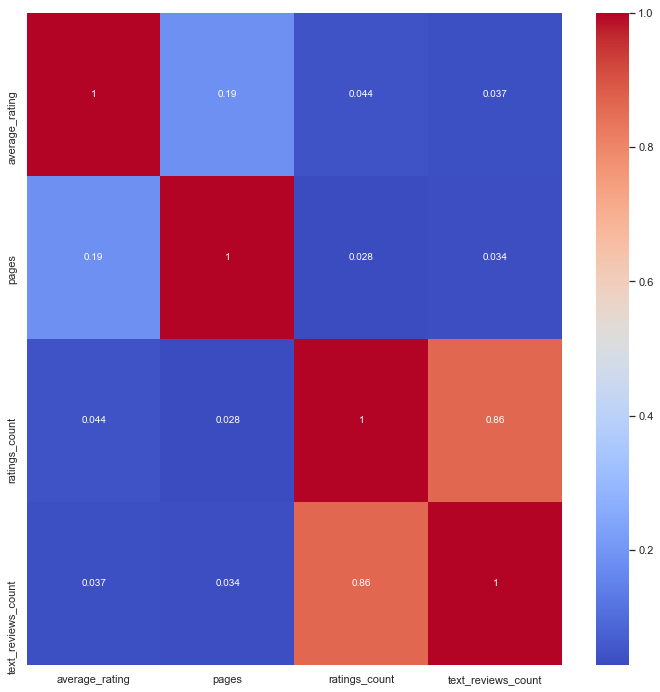

In [49]:
correlatedata = df.corr()
names = correlatedata.index
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(df[names].corr(), annot = True, cmap ='coolwarm')

#### Removing the 'faulty' data improved the correlation between so features

In [50]:
#just taking another look at descriptive stats
df.describe()

,average_rating,pages,ratings_count,text_reviews_count
count,13604.000000,13604.000000,1.360400e+04,13604.000000
mean,3.940712,342.979712,1.790922e+04,537.949133
std,0.297680,252.629544,1.134016e+05,2538.753860
min,1.000000,0.000000,1.000000e+00,0.000000
25%,3.770000,197.000000,8.800000e+01,8.000000
50%,3.960000,302.000000,6.500000e+02,41.000000
75%,4.130000,421.250000,4.802750e+03,225.000000
max,5.000000,6576.000000,5.629932e+06,93619.000000


In [51]:
#just checking to make sure the books where removed
print(df.loc[df['title'] == 'Lonely Planet'])

Empty DataFrame
Columns: [title, authors, average_rating, isbn, isbn13, language_code, pages, ratings_count, text_reviews_count]
Index: []


### 5. Examine Authors and Titles

In [52]:
#Count total values including null values
df['authors'].size

13604

In [53]:
#Count only non-null values, use count:
df['authors'].count()

13604

In [54]:
#Count unique
df['authors'].nunique()

7528

The above indicates that there are authors with multiple books in the dataset.  

In [55]:
bestauthors = df.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', ascending = False)
print(bestauthors)

                                                authors  average_rating
3333  Jean-Paul Gabilliet-François Gallix-Janice Fia...            5.00
5013               Middlesex Borough Heritage Committee            5.00
6962                               Todd Davis-Marc Frey            5.00
3518                                      John  Diamond            5.00
5222                    Nicholas    Evans-Rhonda  Evans            5.00
5722                                     R. McL. Wilson            5.00
2185                                  Frederick P. Lenz            5.00
5111                                         NOT A BOOK            5.00
6738                                    Svetlana Alpers            5.00
6183                                       Ross Garnaut            5.00
1552                           Dennis Adler-R.L. Wilson            5.00
1071   Chris    Green-Chris Wright-Paul Douglas Gardner            5.00
3872                    Julie Sylvester-David Sylvester         

In [56]:
#I want to see all authors with a book with a rating of 5
fivestarauthors = df[df['average_rating'] == 5.0]
print(fivestarauthors)

                                                   title  \
879                    Willem de Kooning: Late Paintings   
963    Literature Circle Guide: Bridge to Terabithia:...   
1442   Middlesex Borough (Images of America: New Jersey)   
1624   The Decoration of the Torre de la Parada (Corp...   
2988          Insights: Talks On The Nature Of Existence   
4940   Zone of the Enders: The 2nd Runner Official St...   
5788   The Diamond Color Meditation: Color Path to th...   
6079   The Complete Theory Fun Factory: Music Theory ...   
6598   The Goon Show  Volume 4: My Knees Have Fallen ...   
6600   The Goon Show  Volume 11: He's Fallen in the W...   
6790                                 Winchester Shotguns   
6791   Colossians and Philemon: A Critical and Exeget...   
7437                           Taxation of Mineral Rents   
7509                         The New Big Book of America   
8149   Delwau Duon: Peintiadau Nicholas Evans = Symph...   
8406             Calvin y Hobbes 10: El 

In [57]:
len(df[df['average_rating'] == 5.0])

23

#### A. Dropping Books that have few rates.
There are 18 authors who have an average rating over all their books of 5.  There are 23 author who have a book line with a 5  ratings. However, none of these have many rates, i.e., ratings_count < 6.  Therefore, I am going to leave them in their own dataframe.  I will call it, "Take_a_chance",
and describe as such - something like - 'these books have 5 stars, but have only been rated by a limited number of readers'.
I will then remove the 23 books plus any book the has less than 50 ratings (abitary choice) from df because if I get to building a recomender, I don't want to recommend books based on so few ratings. 

In [58]:
take_a_chance = pd.DataFrame(df.loc[df.ratings_count < 50])
take_a_chance.shape

(2536, 9)

In [59]:
df.drop(df.index[df.ratings_count < 50], inplace = True)
df.shape
                                     

(11068, 9)

Now I have a list with only books that have been rated by at least 50 reviews.  Let's see how features correlate.  I'm also going to conversion isbn13 to a number to see if there any a correlation - wondering if publisher will play in... but I think I'd have to pull that code out for it to matter...

In [60]:
df['isbn13'] = pd.to_numeric(df['isbn13'])

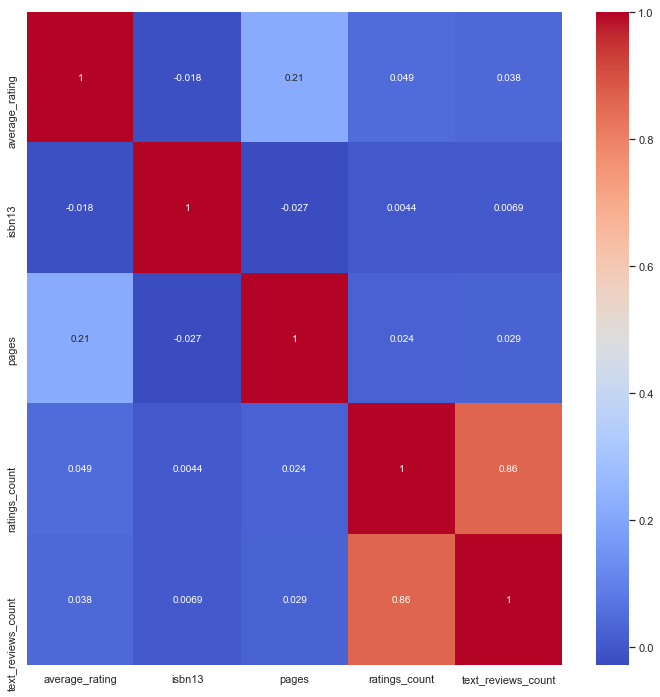

In [61]:
correlatedata = df.corr()
names = correlatedata.index
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(df[names].corr(), annot = True, cmap ='coolwarm')

I realize that this is kindda random here, to add in isbn13 - shoulda done it earlier - nonetheless correlation is low so will drop, also isbn... since pretty much the same as isbn13.... just can't convert to numeric since some contain letters
Also - pulling out books with few ratings slightly increase correlation between features

In [62]:
df = df.drop('isbn', axis=1) 
df = df.drop('isbn13', axis = 1)
df.head()

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [63]:
df['title'].nunique()

10060

In [64]:
df['authors'].nunique()

6015

####  B. Consolidate Titles
There are currently 11068 entries (rows) in my df, but only 10060 unique titles and 6015 unique authors.  It's is expected that some authors have multiple books and these should all be kept in the df.  On the other hand, a separate ISBN is assigned to each edition and variation (except reprintings) of a publication. For example, an ebook, audiobook, paperback, and hardcover edition of the same book will each have a different ISBN. My goal here will be to consolidate ratings and counts of all versions of a single book. 

In [65]:
titlecount = df['title'].value_counts() 
print(titlecount)

One Hundred Years of Solitude                                                                                                              9
'Salem's Lot                                                                                                                               9
The Lord of the Rings (The Lord of the Rings  #1-3)                                                                                        9
The Brothers Karamazov                                                                                                                     8
A Midsummer Night's Dream                                                                                                                  8
Robinson Crusoe                                                                                                                            8
Collected Stories                                                                                                                          8
A Tale of Two

In [66]:
#making a dataframe of with single listing of each title
mtitles = pd.DataFrame(df['title'].value_counts().reset_index().values, columns =["title", "tcount"])
mtlist = mtitles.sort_index(axis = 0, ascending=True)
mtlist.head()

,title,tcount
0,One Hundred Years of Solitude,9
1,'Salem's Lot,9
2,The Lord of the Rings (The Lord of the Rings ...,9
3,The Brothers Karamazov,8
4,A Midsummer Night's Dream,8


In [67]:
#making a dataframe of only titles that are listed more than once
mtlist.drop(mtlist.index[mtlist.tcount == 1], inplace = True)
mtlist.head()

,title,tcount
0,One Hundred Years of Solitude,9
1,'Salem's Lot,9
2,The Lord of the Rings (The Lord of the Rings ...,9
3,The Brothers Karamazov,8
4,A Midsummer Night's Dream,8


In [68]:
mtlist.shape

(607, 2)

There are 607 titles in the df with multiple entries.

In [69]:
#making a list of only titles that are listed more than once to use for consolidating data on those titles
titles_to_consolidate = list(mtlist.title)

In [70]:
print(titles_to_consolidate)

['One Hundred Years of Solitude', "'Salem's Lot", 'The Lord of the Rings (The Lord of the Rings  #1-3)', 'The Brothers Karamazov', "A Midsummer Night's Dream", 'Robinson Crusoe', 'Collected Stories', 'A Tale of Two Cities', 'Anna Karenina', 'The Odyssey', 'The Picture of Dorian Gray', 'Fahrenheit 451', 'Lord of the Flies', 'Heart of Darkness', 'Romeo and Juliet', 'Macbeth', 'Paradise Lost', 'The Great Gatsby', 'Pride and Prejudice', 'Sense and Sensibility', 'Lolita', 'Jane Eyre', 'The Communist Manifesto', 'The Iliad', 'The Scarlet Letter', "The Handmaid's Tale", 'The Secret Garden', 'Treasure Island', 'King Lear', 'The Idiot', 'The Complete Stories', 'Dracula', 'The Histories', 'Deception Point', 'The Return of the King (The Lord of the Rings  #3)', 'Atlas Shrugged', 'Les Misérables', 'War and Peace', 'Don Quixote', 'Great Expectations', 'Memoirs of a Geisha', 'Little Women', "Ender's Game (Ender's Saga  #1)", 'Crime and Punishment', "Gulliver's Travels", 'Siddhartha', 'Mansfield Park

In [71]:
print(len(titles_to_consolidate))

607


In [72]:
df.shape

(11068, 7)

In [73]:
#collecting the data on the titles listed more than once
titledf = pd.DataFrame()
for i in titles_to_consolidate:
    addtitle = pd.DataFrame(df.loc[df.title == i])
    titledf = titledf.append(addtitle)
    addtitle = pd.DataFrame()
titledf.head()   

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count
153,One Hundred Years of Solitude,Gabriel García Márquez-Gregory Rabassa,4.06,eng,417,547207,15763
1772,One Hundred Years of Solitude,Gabriel García Márquez-Gregory Rabassa,4.06,eng,458,3371,315
1774,One Hundred Years of Solitude,Gabriel García Márquez-Gregory Rabassa,4.06,eng,417,84,5
2493,One Hundred Years of Solitude,Gabriel García Márquez-Gregory Rabassa,4.06,eng,448,1510,201
2495,One Hundred Years of Solitude,Gabriel García Márquez-Gregory Rabassa,4.06,eng,422,954,112


In [74]:
titledf.shape

(1615, 7)

In [75]:
titledf.sort_values(by=['title']) 

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count
1846,'Salem's Lot,Stephen King-Ron McLarty,4.01,eng,17,227,55
10992,'Salem's Lot,Stephen King,4.01,eng,427,176,20
1845,'Salem's Lot,Stephen King-Jerry N. Uelsmann,4.25,eng,594,81170,504
6400,'Salem's Lot,Stephen King-Ron McLarty,4.01,en-US,0,55,5
1847,'Salem's Lot,Stephen King,4.01,eng,405,959,121
1850,'Salem's Lot,Stephen King,4.01,eng,446,399,45
1851,'Salem's Lot,Stephen King,4.01,en-US,427,169,33
3781,'Salem's Lot,Stephen King,4.01,eng,483,266312,5513
6062,'Salem's Lot,Stephen King,4.01,eng,631,3386,357
364,1776,Peter Stone-Sherman Edwards,4.21,eng,192,1269,30


In [76]:
#for number of pages I will use the one listed that is the greatest 
conpages = titledf.groupby('title')['pages'].max()
conpages.head(5)

title
'Salem's Lot                            631
1776                                    386
1984                                    301
3rd Degree (Women's Murder Club  #3)    352
A Brief History of Time                 241
Name: pages, dtype: int64

In [77]:
conpages = pd.DataFrame(conpages)
conpages.head()

,pages
title,
'Salem's Lot,631
1776,386
1984,301
3rd Degree (Women's Murder Club #3),352
A Brief History of Time,241


In [79]:
#totaling the ratings count and text_reviews_count for each book and more setup for average rating
totals = titledf.groupby('title')['ratings_count', 'text_reviews_count', 'avgratexratecount'].sum().reset_index().sort_values('ratings_count', 
ascending=False)
totals.head()

,title,ratings_count,text_reviews_count,avgratexratecount
169,Harry Potter and the Sorcerer's Stone (Harry P...,5630064,70402,25166386.08
578,Twilight (Twilight #1),4369733,94163,15687341.47
387,The Catcher in the Rye,2337327,44033,8881842.60
43,Angels & Demons (Robert Langdon #1),2281009,20995,8850314.92
168,Harry Potter and the Prisoner of Azkaban (Harr...,2152988,34111,9796095.40


In [80]:
#calculating and adding average rating
totals['weightedavgrate'] = totals.avgratexratecount/totals.ratings_count
totals.head()

,title,ratings_count,text_reviews_count,avgratexratecount,weightedavgrate
169,Harry Potter and the Sorcerer's Stone (Harry P...,5630064,70402,25166386.08,4.47
578,Twilight (Twilight #1),4369733,94163,15687341.47,3.59
387,The Catcher in the Rye,2337327,44033,8881842.60,3.80
43,Angels & Demons (Robert Langdon #1),2281009,20995,8850314.92,3.88
168,Harry Potter and the Prisoner of Azkaban (Harr...,2152988,34111,9796095.40,4.55


In [81]:
df.shape

(11068, 7)

In [82]:
df = df.drop_duplicates(subset='title', keep="first")
df.shape

(10060, 7)

In [83]:
df.set_index(df['title'], inplace = True)
df.head()

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count
title,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
Harry Potter and the Order of the Phoenix (Harry Potter #5),Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
Harry Potter and the Chamber of Secrets (Harry Potter #2),Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [84]:
print(df.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages                                                    417
ratings_count                                         547207
text_reviews_count                                     15763
Name: One Hundred Years of Solitude, dtype: object


In [85]:
df.set_index(df['title'], inplace = True)

In [86]:
df.head()

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count
title,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249
Harry Potter and the Order of the Phoenix (Harry Potter #5),Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613
Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390
Harry Potter and the Chamber of Secrets (Harry Potter #2),Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964


In [87]:
totals.set_index(totals['title'], inplace = True)

In [88]:
totals.rename(columns={'ratings_count':'tot_ratings', 'text_reviews_count':'tot_text_reviews'}, inplace=True)

In [89]:
print(df.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages                                                    417
ratings_count                                         547207
text_reviews_count                                     15763
Name: One Hundred Years of Solitude, dtype: object


In [90]:
totals.head()

,title,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate
title,,,,,
Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Sorcerer's Stone (Harry P...,5630064,70402,25166386.08,4.47
Twilight (Twilight #1),Twilight (Twilight #1),4369733,94163,15687341.47,3.59
The Catcher in the Rye,The Catcher in the Rye,2337327,44033,8881842.60,3.80
Angels & Demons (Robert Langdon #1),Angels & Demons (Robert Langdon #1),2281009,20995,8850314.92,3.88
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Harry Potter and the Prisoner of Azkaban (Harr...,2152988,34111,9796095.40,4.55


In [91]:
print(df.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages                                                    417
ratings_count                                         547207
text_reviews_count                                     15763
Name: One Hundred Years of Solitude, dtype: object


In [92]:
df2 = df.merge(totals ,how='left', left_on='title', right_on='title')
df2.shape

C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'title' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


(10060, 11)

In [93]:
df2.head()

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249,1945272.0,26321.0,8870440.32,4.56
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613,NaN,NaN,NaN,NaN
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390,5630064.0,70402.0,25166386.08,4.47
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272,2121829.0,32966.0,9357265.89,4.41
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964,2152988.0,34111.0,9796095.40,4.55


In [95]:
df2.set_index(df2['title'], inplace = True)

In [96]:
print(df2.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages                                                    417
ratings_count                                         547207
text_reviews_count                                     15763
tot_ratings                                           556920
tot_text_reviews                                       16788
avgratexratecount                                 2.2611e+06
weightedavgrate                                         4.06
Name: One Hundred Years of Solitude, dtype: object


In [97]:
df3 = df2.merge(conpages ,how='left', left_on='title', right_on='title')

C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'title' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [98]:
df3.shape

(10060, 12)

In [99]:
df3.head()

,title,authors,average_rating,language_code,pages_x,ratings_count,text_reviews_count,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate,pages_y
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249,1945272.0,26321.0,8870440.32,4.56,768.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390,5630064.0,70402.0,25166386.08,4.47,424.0
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272,2121829.0,32966.0,9357265.89,4.41,352.0
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964,2152988.0,34111.0,9796095.40,4.55,480.0


In [100]:
df3.describe()

,average_rating,pages_x,ratings_count,text_reviews_count,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate,pages_y
count,10060.000000,10060.000000,1.006000e+04,10060.000000,6.070000e+02,607.000000,6.070000e+02,607.000000,607.000000
mean,3.949480,349.971869,2.052363e+04,627.731113,1.770542e+05,4448.729819,7.126503e+05,3.955022,433.023064
std,0.270811,251.778966,1.140261e+05,2534.822535,4.358014e+05,8866.759819,1.793845e+06,0.244513,243.032613
min,2.400000,0.000000,5.000000e+01,0.000000,1.400000e+02,6.000000,5.908000e+02,3.080000,11.000000
25%,3.780000,208.000000,3.000000e+02,21.000000,7.222500e+03,364.500000,2.811037e+04,3.820000,263.500000
50%,3.960000,304.000000,1.497500e+03,80.000000,3.782200e+04,1352.000000,1.498077e+05,3.970000,371.000000
75%,4.140000,420.000000,8.081250e+03,338.250000,1.499660e+05,4812.500000,5.909982e+05,4.110000,530.500000
max,4.820000,6576.000000,5.629932e+06,84237.000000,5.630064e+06,94163.000000,2.516639e+07,4.560000,1546.000000


In [101]:
df3.set_index(df3['title'], inplace = True)
df3.head()

,title,authors,average_rating,language_code,pages_x,ratings_count,text_reviews_count,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate,pages_y
title,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249,1945272.0,26321.0,8870440.32,4.56,768.0
Harry Potter and the Order of the Phoenix (Harry Potter #5),Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613,NaN,NaN,NaN,NaN,NaN
Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390,5630064.0,70402.0,25166386.08,4.47,424.0
Harry Potter and the Chamber of Secrets (Harry Potter #2),Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272,2121829.0,32966.0,9357265.89,4.41,352.0
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964,2152988.0,34111.0,9796095.40,4.55,480.0


In [102]:
df3.set_index(df3['title'], inplace = True)

In [103]:
print(df3.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages_x                                                  417
ratings_count                                         547207
text_reviews_count                                     15763
tot_ratings                                           556920
tot_text_reviews                                       16788
avgratexratecount                                 2.2611e+06
weightedavgrate                                         4.06
pages_y                                                  560
Name: One Hundred Years of Solitude, dtype: object


In [104]:
df4 = df3
for t in titles_to_consolidate:
    df4.loc[t, 'average_rating'] = df3.loc[t, 'weightedavgrate']
    df4.loc[t, 'ratings_count'] = df3.loc[t, 'tot_ratings']
    df4.loc[t, 'text_reviews_count'] = df3.loc[t, 'tot_text_reviews']

In [105]:
for t in titles_to_consolidate:
    df4.at[t, 'pages_x'] = df3.at[t, 'pages_y']

In [106]:
#just checking numbers ie comparing rating_count to tot_ratings
print(df4.loc['One Hundred Years of Solitude',:])

title                          One Hundred Years of Solitude
authors               Gabriel García Márquez-Gregory Rabassa
average_rating                                          4.06
language_code                                            eng
pages_x                                                  560
ratings_count                                         556920
text_reviews_count                                     16788
tot_ratings                                           556920
tot_text_reviews                                       16788
avgratexratecount                                 2.2611e+06
weightedavgrate                                         4.06
pages_y                                                  560
Name: One Hundred Years of Solitude, dtype: object


In [107]:
df4.drop('tot_ratings', axis = 1, inplace = True)
df4.drop('tot_text_reviews', axis = 1, inplace = True)
df4.drop('avgratexratecount', axis = 1, inplace = True)
df4.drop('weightedavgrate', axis = 1, inplace = True)
df4.drop('pages_y', axis = 1, inplace = True)
df4.drop('title', axis = 1, inplace = True)
df4.head()

,authors,average_rating,language_code,pages_x,ratings_count,text_reviews_count
title,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling-Mary GrandPré,4.56,eng,768,1945272.0,26321.0
Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446.0,27613.0
Harry Potter and the Sorcerer's Stone (Harry Potter #1),J.K. Rowling-Mary GrandPré,4.47,eng,424,5630064.0,70402.0
Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling,4.41,eng,352,2121829.0,32966.0
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling-Mary GrandPré,4.55,eng,480,2152988.0,34111.0


In [108]:
df4.reset_index(level=0, inplace=True)
df4.head()

,title,authors,average_rating,language_code,pages_x,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,768,1945272.0,26321.0
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446.0,27613.0
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,424,5630064.0,70402.0
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,2121829.0,32966.0
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,480,2152988.0,34111.0


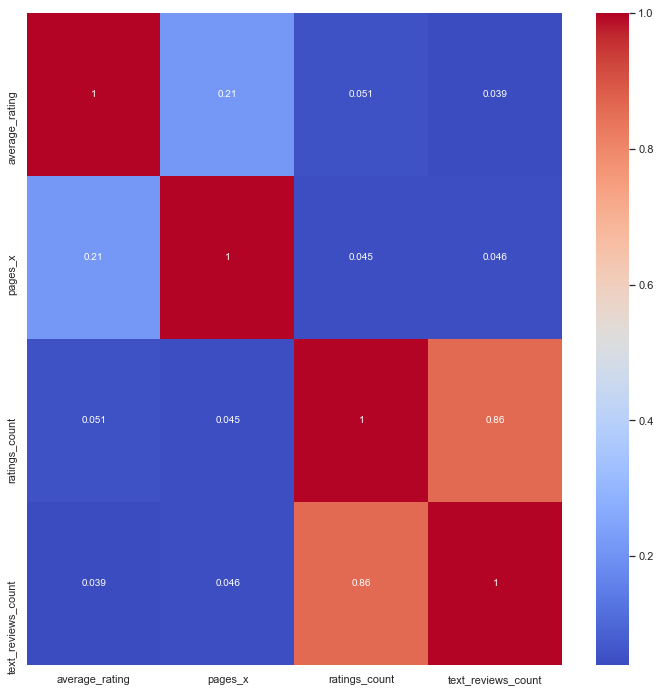

In [109]:
correlatedata = df4.corr()
names = correlatedata.index
plt.figure(figsize =(12,12))
corrmap = sns.heatmap(df3[names].corr(), annot = True, cmap ='coolwarm')

In [110]:
df4.describe()

,average_rating,pages_x,ratings_count,text_reviews_count
count,10060.000000,10060.000000,1.006000e+04,10060.000000
mean,3.949525,353.205368,2.421361e+04,726.940656
std,0.270620,253.140163,1.318512e+05,2966.671084
min,2.400000,0.000000,5.000000e+01,0.000000
25%,3.780000,208.000000,3.170000e+02,22.000000
50%,3.960000,307.000000,1.655000e+03,85.000000
75%,4.130078,424.000000,8.954250e+03,381.000000
max,4.820000,6576.000000,5.630064e+06,94163.000000


In [111]:
#makisure all in there and there are no Nans
df3.describe()

,average_rating,pages_x,ratings_count,text_reviews_count
count,10060.000000,10060.000000,1.006000e+04,10060.000000
mean,3.949525,353.205368,2.421361e+04,726.940656
std,0.270620,253.140163,1.318512e+05,2966.671084
min,2.400000,0.000000,5.000000e+01,0.000000
25%,3.780000,208.000000,3.170000e+02,22.000000
50%,3.960000,307.000000,1.655000e+03,85.000000
75%,4.130078,424.000000,8.954250e+03,381.000000
max,4.820000,6576.000000,5.630064e+06,94163.000000


In [113]:
df2.head()

,title,authors,average_rating,language_code,pages,ratings_count,text_reviews_count,tot_ratings,tot_text_reviews,avgratexratecount,weightedavgrate
title,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,eng,652,1944099,26249,1945272.0,26321.0,8870440.32,4.56
Harry Potter and the Order of the Phoenix (Harry Potter #5),Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,eng,870,1996446,27613,NaN,NaN,NaN,NaN
Harry Potter and the Sorcerer's Stone (Harry Potter #1),Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,eng,320,5629932,70390,5630064.0,70402.0,25166386.08,4.47
Harry Potter and the Chamber of Secrets (Harry Potter #2),Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,eng,352,6267,272,2121829.0,32966.0,9357265.89,4.41
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,eng,435,2149872,33964,2152988.0,34111.0,9796095.40,4.55


### 6. Split the Current DF based on Language

In [114]:
langlist = df4['language_code'].unique().tolist()
print(langlist)

['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'por', 'grc', 'enm', 'en-CA', 'jpn', 'ger', 'ara', 'zho', 'nl', 'ita', 'lat', 'rus', 'swe', 'glg', 'cat', 'heb', 'nor', 'tur']


In [115]:
#group books into 2 groups - 1. all in english 2. foreign - all the rest
engdf1 = pd.DataFrame(df4.loc[df4.language_code == 'eng'])
engdf2 = pd.DataFrame(df4.loc[df4.language_code == 'en-US'])
engdf3 = pd.DataFrame(df4.loc[df4.language_code == 'en-GB'])
engdf4 = pd.DataFrame(df4.loc[df4.language_code == 'en-CA'])
allengdf = pd.concat([engdf1,engdf2, engdf3, engdf4])

In [116]:
allengdf.to_csv('alleng.csv')

In [117]:
allengdf.shape

(9653, 7)

In [118]:
foreigndf = pd.DataFrame(df4.loc[df4.language_code != 'eng'])
foreigndf = pd.DataFrame(foreigndf.loc[foreigndf.language_code != 'en-US'])
foreigndf  = pd.DataFrame(foreigndf.loc[foreigndf.language_code != 'en-GB'])
foreigndf  = pd.DataFrame(foreigndf.loc[foreigndf.language_code != 'en-CA'])

In [119]:
foreigndf.shape

(407, 7)

### Summary of Dataframes:
1. allengdf:  This is the main dataframe I will work with in R Shiny.  It includes all books the are written in english (from any country) and that have a significant number of rates (50 or more).  Note: the number of pages listed in the dataframe is not necessarily accurate for these book (versions vary in length), the longest version is represented. 
2. foreigndf: Includes all books the are written in a language other than english and that have a significant number of rates (50 or more).  Note: the number of pages listed in the dataframe is not necessarily accurate for these book (versions vary in length).
3. take_a_chance: these have only been rated by a limited number of readers, however some did get the highest rating, 5.

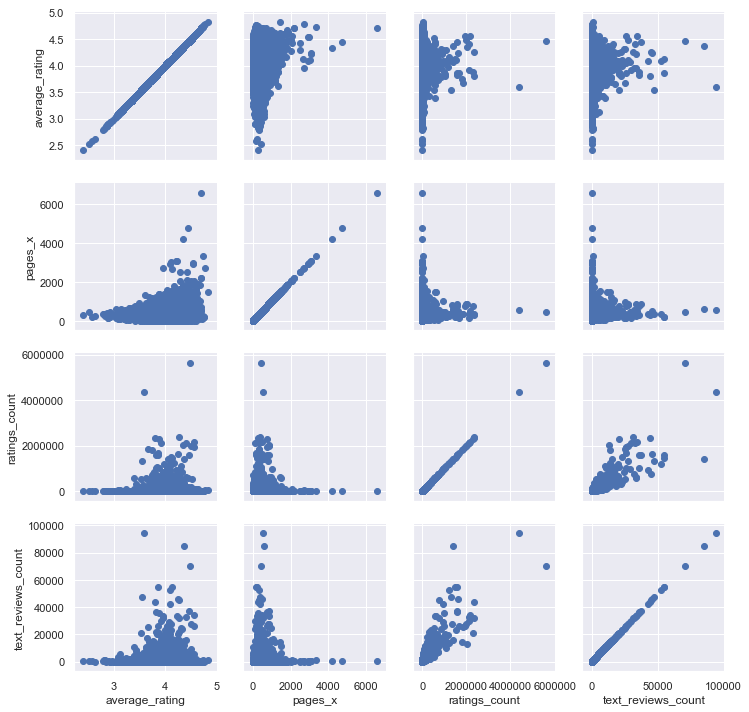

In [121]:
g = sns.PairGrid(allengdf, vars=['average_rating', 'pages_x', 'ratings_count', 'text_reviews_count' ])
g = g.map(plt.scatter)

In [122]:
#It is interesting that when i remove multiple "versions" of a title and only keep the longest version number of pages, 
#the correlation between rating and length is quite reduced (as evident by corr and by blot above)

In [123]:
#am trying klustering with auther as a feature, since most authors in df only have one book, this may not
#be the best idea, but I see what happen and intend to try other means to examine the data as well
from sklearn.cluster import KMeans

allengdf2 = pd.get_dummies(allengdf, columns=['authors'])
allengdf2.head()


,title,average_rating,language_code,pages_x,ratings_count,text_reviews_count,authors_A.B. Yehoshua-Hillel Halkin,authors_A.J. Jacobs,authors_A.M. Homes,authors_A.N. Roquelaure-Anne Rice,...,authors_Zora Neale Hurston-Cheryl A. Wall,authors_Zora Neale Hurston-Ruby Dee,authors_Zoë Heller,authors_bell hooks,authors_bell hooks-Shane W. Evans,authors_Åsne Seierstad-Ingrid Christopherson,authors_Émile Zola-Douglas Parmée,authors_Émile Zola-Robert Lethbridge-Elinor Dorday,authors_Émile Zola-Robin Buss-Brian Nelson,authors_Émile Zola-Roger Pearson
0,Harry Potter and the Half-Blood Prince (Harry ...,4.56,eng,768,1945272.0,26321.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,1996446.0,27613.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Harry Potter and the Sorcerer's Stone (Harry P...,4.47,eng,424,5630064.0,70402.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Harry Potter and the Chamber of Secrets (Harry...,4.41,eng,352,2121829.0,32966.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.55,eng,480,2152988.0,34111.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#scale selected features (z-socre)
allengdfstd = allengdf2
allengdfstd[['average_rating', 'pages', 'ratings_count', 'text_reviews_count']] = StandardScaler().fit_transform(allengdfstd[['average_rating', 'pages_x', 'ratings_count', 'text_reviews_count']])
allengdfstd.drop('title', axis = 1, inplace = True)
allengdfstd.drop('language_code', axis = 1, inplace = True)
#may get dummies for language later based on the 4 eng types)
allengdfstd.to_csv('allengdfstd.csv')
allengdfstd.head(5)

C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kathy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KeyError: "['pages'] not in index"

In [ ]:
# find the appropriate cluster number - take long to run so commented out for the moment - running shows elbow at 4-5 clusters
#plt.figure(figsize=(10, 8))
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(2, 12):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(allengdfstd)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#Within Cluster Sum of Squares (for my info)

In [ ]:
# Fitting data with K means
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
#But you're not going to like it....
clust_labels = kmeans.fit_predict(allengdfstd)
cent = kmeans.cluster_centers_
catlabels = clust_labels + 1


cluster = pd.DataFrame(catlabels)
allengdf2['cluster'] = cluster
#for export to csv.
allengdfstd['cluster'] = cluster
allengdfstd.to_csv('Kmeans4results.csv')
kmeans_mean_cluster = pd.DataFrame(round(allengdf2.groupby('cluster').mean(),1))
kmeans_mean_cluster

NameError: name 'cluster' is not defined

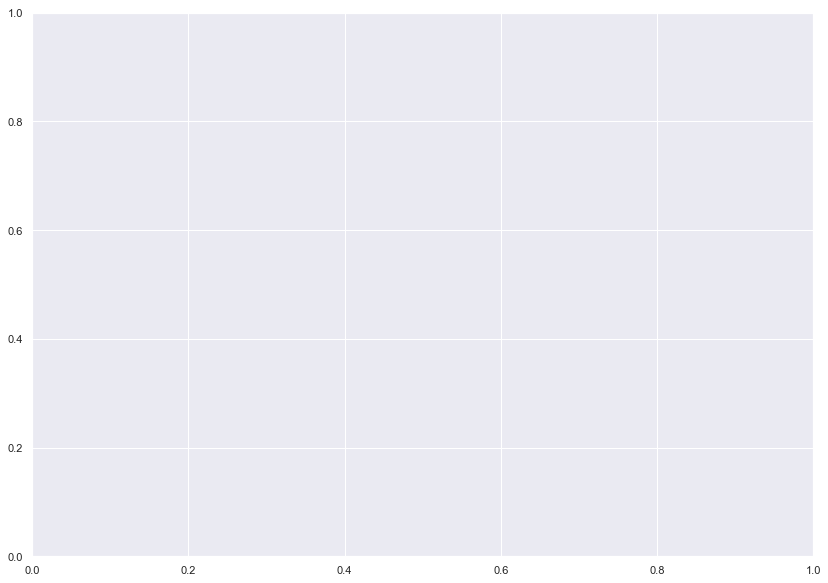

In [125]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(allengdf2['authors_Agatha Christie'], allengdf2['average_rating'], c= cluster[0], s=50, cmap='gist_rainbow')
ax.set_title('K-Means Clustering')
ax.set_xlabel('authors_Agatha Christie')
ax.set_ylabel('average_rating')


In [ ]:
df["authors"].value_counts().head(10)

In [ ]:
best=df.sort_values(by='average_rating', ascending=False).head(20)
best.head(10)

In [ ]:
fivestar = df['average_rating'] == 5.0
allfivestar = df[fivestar]
print(allfivestar.shape)

print(allfivestar.head())

In [ ]:
plt.scatter(df.authors, df.average_rating, s = np.array(df.ratings_count) * 4.5)
plt.xlabel('x')
plt.ylabel('y')

plt.show

In [ ]:
sns.barplot(y=bigdf['title'], x=bigdf['ratings_count'], palette = 'Accent')

In [ ]:
bestauthors = df.groupby('authors')['average_rating'].mean().reset_index().sort_values('average_rating', 
ascending=False).head(25)

sns.barplot(y=bestauthors['authors'],x=bestauthors['average_rating'], palette = 'Accent')

In [ ]:
#Random Forest before scaling no dumbies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('RF (no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('DT (no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier()
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x_d, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('DT (no scaling, w/ dummies) Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
#reduced dataset -remove selected features with low corr to target
xdropch_fb = x.drop('chol', axis =1)
xdropch_fb = xdropch_fb.drop('fbs', axis =1)
xdropch_fb.head()

In [ ]:
#RF with reduced dataset no dummies
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fb, y, test_size=0.3) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    meanten.append(acc)
print('RF (reduced data, no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fb, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('DT (reduced data, no scaling, no dummies) Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
#categorical data "transformation" of reduced dataset
xdropch_fbd = pd.get_dummies(xdropch_fb, columns=['sex', 'exang', 'thal'])
xdropch_fbd.head()

In [ ]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fbd, y, test_size=0.2) 
    RFmodel=RandomForestClassifier(n_estimators=10)
    RFmodel.fit(X_train,y_train)
    y_pred=RFmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    meanten.append(acc)
print(np.array(meanten).mean())

In [ ]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(xdropch_fbd, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(acc)
    meanten.append(acc)
print('Accuracy (mean of 10)', np.array(meanten).mean())

In [ ]:
#scale selected features (z-socre), dataset with dummies
x_ds = x_d
x_ds[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = StandardScaler().fit_transform(x_ds[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
x_ds.head()

In [ ]:
meanten = []
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(x_ds, y, test_size=0.2) 
    DTmodel.fit(X_train,y_train)
    y_pred=DTmodel.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    meanten.append(acc)
print('Accuracy (mean of 100)', np.array(meanten).mean())

In [ ]:
plt.hist(oldpeaklog, bins=10)
plt.ylabel('No of times')
plt.show()

In [ ]:
plt.hist(heartdata['oldpeak'])
plt.ylabel('#')
plt.show

In [ ]:
plt.scatter(heartdata['oldpeak'], y)
plt.show


In [ ]:
# not sure how to transform so will leave simply as z-score for now, looks like ca same
#these have a decent negative correlation with target so maybe be helpful if properly transformed 
#maybe binning, maybe not necessary

In [ ]:
#scout classifiers with scaled data (RF and DT included even tho don't need scaling)
#first - x_ds - all featured
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ds, y, test_size=0.2) 

from sklearn import metrics

In [ ]:
#scout classifiers with transformed data
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers = []
RFmodel = RandomForestClassifier()
classifiers.append(RFmodel)
SVMmodel = svm.SVC()
classifiers.append(SVMmodel)
DTmodel = DecisionTreeClassifier()
classifiers.append(DTmodel)
KNmodel = KNeighborsClassifier(n_neighbors=3)
classifiers.append(KNmodel)
LRmodel = LogisticRegression()
classifiers.append(LRmodel)

In [ ]:
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print((i))
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()

In [ ]:
#second - xdropch_fbds - all featured
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdropch_fbds, y, test_size=0.2) 

In [ ]:
for i in classifiers:
    i.fit(X_train, y_train)
    y_pred= i.predict(X_test)
    print((i))
    print('Model score: ', i.score(X_train, y_train))
    print("Accuracy:  ", metrics.accuracy_score(y_test, y_pred))
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    print(cm)
    print()
    